In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
main_df=pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=416&path=medical_insurance_cost.csv")

In [4]:
main_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
main_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [11]:
train_df,test_df=train_test_split(main_df,random_state=46)

In [12]:
train_df=pd.get_dummies(train_df,drop_first=True)

In [13]:
train_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
662,32,31.540,1,5148.55260,False,False,False,False,False
784,31,29.260,1,4350.51440,False,False,False,True,False
751,21,28.975,0,1906.35825,True,False,True,False,False
1142,52,24.860,0,27117.99378,False,False,False,True,False
1286,28,17.290,0,3732.62510,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
658,48,35.910,1,26392.26029,False,False,False,False,False
403,49,32.300,3,10269.46000,True,False,True,False,False
442,18,43.010,0,1149.39590,True,False,False,True,False
837,56,28.310,0,11657.71890,False,False,False,False,False


In [15]:
train_df.isna().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [17]:
x_train= train_df.drop(columns=['charges'])
y_train= train_df['charges']

In [18]:
x_train=pd.get_dummies(x_train,drop_first=True)

In [19]:
x_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
662,32,31.540,1,False,False,False,False,False
784,31,29.260,1,False,False,False,True,False
751,21,28.975,0,True,False,True,False,False
1142,52,24.860,0,False,False,False,True,False
1286,28,17.290,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...
658,48,35.910,1,False,False,False,False,False
403,49,32.300,3,True,False,True,False,False
442,18,43.010,0,True,False,False,True,False
837,56,28.310,0,False,False,False,False,False


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linreq_model=LinearRegression()
linreq_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
train_preds=linreq_model.predict(x_train)

In [23]:
train_preds

array([ 7416.02965285,  5339.97985438,  2898.83111279, ...,
        5852.74261156, 11899.6979995 , 13160.45124023], shape=(1003,))

<Axes: xlabel='charges'>

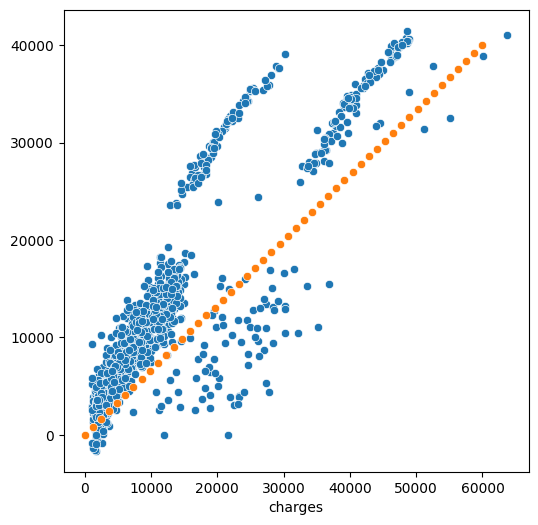

In [27]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_train,y=train_preds)
sns.scatterplot(x=np.linspace(0,60000),y=np.linspace(0,40000))